In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Data Preprocessing

In [3]:
#Datapreprocess
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# reshape the dimension of images to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)


In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Model Buildig

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
model.fit(X_train,y_train, epochs=5, batch_size=64, validation_split=0.2)
 

Epoch 1/5
750/750 [==============================] - 51s 64ms/step - loss: 0.2123 - accuracy: 0.9342 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0634 - val_accuracy: 0.9813
Epoch 3/5
750/750 [==============================] - 46s 62ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0440 - val_accuracy: 0.9872
Epoch 4/5
750/750 [==============================] - 48s 64ms/step - loss: 0.0308 - accuracy: 0.9896 - val_loss: 0.0459 - val_accuracy: 0.9864
Epoch 5/5
750/750 [==============================] - 51s 68ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0411 - val_accuracy: 0.9874


# Model Evaluation

In [18]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy:", test_acc)
print("test loss: ", test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.0327 - accuracy: 0.9894
test accuracy: 0.9894000291824341
test loss:  0.032678328454494476


In [19]:
predictions = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [20]:
# Convert predictions to class labels (assuming one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)


# Prediction and Visualization

In [21]:
num_examples_to_visualize = 5
for i in range(num_examples_to_visualize):
    print(f"True Label: {y_test[i]}, Predicted Label: {predicted_labels[i]}")


True Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted Label: 7
True Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], Predicted Label: 2
True Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted Label: 1
True Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted Label: 0
True Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], Predicted Label: 4


In [22]:
import matplotlib.pyplot as plt

def visualize_test_examples(images, true_labels, predicted_labels, num_examples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

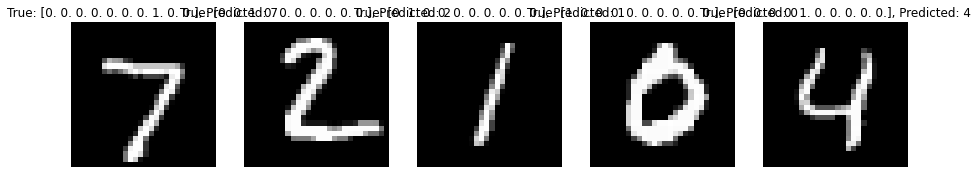

In [23]:
visualize_test_examples(X_test, y_test, predicted_labels)